# VALIDATION OF ML MODELS


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.svm import OneClassSVM

from sklearn.metrics import classification_report
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
import pandas as pd
from csv import reader
pd.set_option('display.max_columns', 50)
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics



In [20]:
X=pd.read_csv("X_smote.csv",sep=',',dtype=np.float32)
y=pd.read_csv("y_smote.csv")

In [10]:
print(X.index[np.isinf(X).any(1)])
print(X.isna().values.any())
print (X.shape)
print(y.shape)
print(X.columns)

Int64Index([], dtype='int64')
False
(4900912, 78)
(4900912, 1)
Index(['Dst Port', ' Protocol', ' Flow Duration', ' Tot Fwd Pkts',
       ' Tot Bwd Pkts', ' TotLen Fwd Pkts', ' TotLen Bwd Pkts',
       ' Fwd Pkt Len Max', ' Fwd Pkt Len Min', ' Fwd Pkt Len Mean',
       ' Fwd Pkt Len Std', ' Bwd Pkt Len Max', ' Bwd Pkt Len Min',
       ' Bwd Pkt Len Mean', ' Bwd Pkt Len Std', ' Flow Byts/s', ' Flow Pkts/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       ' Fwd IAT Tot', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', ' Bwd IAT Tot', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Len',
       ' Bwd Header Len', ' Fwd Pkts/s', ' Bwd Pkts/s', ' Pkt Len Min',
       ' Pkt Len Max', ' Pkt Len Mean', ' Pkt Len Std', ' Pkt Len Var',
       ' FIN Flag Cnt', ' SYN Flag Cnt', ' RST Flag Cnt', ' PSH Flag Cnt',
       ' ACK Fl

In [3]:
nom_cols=[' Flow Duration', ' TotLen Fwd Pkts',
          ' TotLen Bwd Pkts', ' Tot Fwd Pkts',' Tot Bwd Pkts',
          ' Fwd Pkt Len Mean',' Bwd Pkt Len Mean' , 'Subflow Fwd Pkts', 
          'Subflow Fwd Byts',' Subflow Bwd Pkts', 'Subflow Bwd Byts' ] #'Dst Port',' Protocol',
X_13f = X [nom_cols]
print(X_13f.shape)

(4902609, 11)


In [4]:
%%time
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_13f, y)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


CPU times: user 38min 24s, sys: 13.3 s, total: 38min 37s
Wall time: 5min 6s


RandomForestClassifier(n_jobs=-1)

In [5]:

X_Test=pd.read_csv("X_Test.csv",sep=',',dtype=np.float32)
y_Test=pd.read_csv("y_Test.csv")
X_13f_test = X_Test [nom_cols]

# make predictions
expected = y_Test
predicted = model.predict(X_13f_test)

In [6]:
%%time
# summarize the fit of the model
print("****************-----VALIDATION---*******************")
print("********************RANDOM FOREST 11 feats no prot, port *******************")
print(classification_report(expected,predicted))
print(metrics.accuracy_score(expected,predicted))

****************-----VALIDATION---*******************
********************RANDOM FOREST 11 feats no prot, port *******************
               precision    recall  f1-score   support

       Benign       0.95      0.96      0.96   1094088
          Bot       0.88      0.98      0.93    231727
   Bruteforce       0.77      0.95      0.85    308640
         DDoS       0.86      0.95      0.90   1023004
          DoS       0.81      0.53      0.64    529698
Infilteration       0.95      0.61      0.74    131380
   Web_attack       0.03      0.82      0.06       744

     accuracy                           0.87   3319281
    macro avg       0.75      0.83      0.73   3319281
 weighted avg       0.88      0.87      0.87   3319281

0.8735268270447727
CPU times: user 1min 59s, sys: 24.4 ms, total: 1min 59s
Wall time: 1min 59s


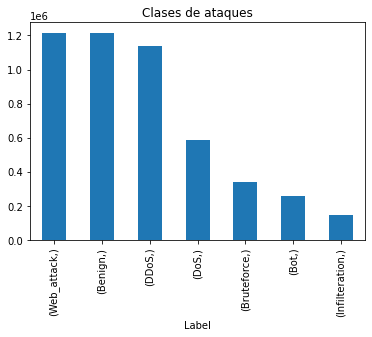

In [7]:
import pandas as pd
from csv import reader
import numpy as np
#from google.colab import drive
#drive.mount('/content/gdrive')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM
from keras_self_attention import SeqWeightedAttention


import matplotlib.pyplot as plot
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

pd.set_option('display.max_columns', 50)
import tensorflow as tf
import keras
plot = y.value_counts().plot(kind='bar',title='Clases de ataques')

In [9]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_enco = encoder.fit_transform(y)
y_enc = pd.DataFrame(data=y_enco)
print(y_enc.head(2))

encoder = LabelBinarizer()
y_Test_enco = encoder.fit_transform(y_Test)
y_Test_enc = pd.DataFrame(data=y_Test_enco)
print(y_Test_enc.head(2))

   0  1  2  3  4  5  6
0  0  0  1  0  0  0  0
1  0  0  0  0  1  0  0
   0  1  2  3  4  5  6
0  0  0  0  0  1  0  0
1  0  0  0  0  0  1  0


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1, 256)            274432    
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 256)            525312    
_________________________________________________________________
seq_weighted_attention_4 (Se (None, 256)               257       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
_________________________________________________________________
dense_15 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_16 (Dense)             (None, 14)                294       
_________________________________________________________________
dense_17 (Dense)             (None, 7)                

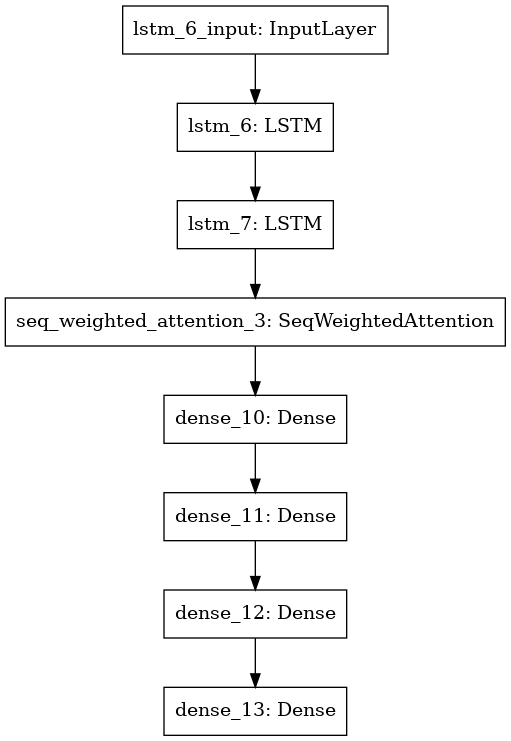

In [43]:
cant_clases = pd.unique(y_Test.squeeze())

def modeloB():
    model = Sequential()
    model.add(LSTM(256,input_shape=(1,11),activation='relu',return_sequences=True))
    model.add(LSTM(256,activation='relu',return_sequences=True))
    model.add(SeqWeightedAttention())
#https://github.com/CyberZHG/keras-self-attention/issues/12
    model.add(Dense(1))
    model.add(Dense(20))
    model.add(Dense(cant_clases.size*2))
    model.add(Dense(cant_clases.size, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model1 = modeloB()
model1.summary()
tf.keras.utils.plot_model(model, to_file='multiple_outputs.png')

In [41]:


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_X = scaler.fit_transform(X_13f)
scaled_X_Test = scaler.fit_transform(X_13f_test)
X_nn=scaled_X.reshape((scaled_X.shape[0], 1, scaled_X.shape[1]))
X_t_nn=scaled_X_Test.reshape((scaled_X_Test.shape[0], 1, scaled_X_Test.shape[1]))
print (scaled_X.shape)
print(X_nn.shape)
print (scaled_X_Test.shape)
print(X_t_nn.shape)

(4902609, 11)
(4902609, 1, 11)
(3319281, 11)
(3319281, 1, 11)


In [44]:
import math
his=model1.fit(X_nn, y_enc, validation_data=(X_t_nn, y_Test_enc), epochs=70, verbose=2,batch_size=128)

Epoch 1/70
38302/38302 - 551s - loss: 1.1955 - accuracy: 0.5395 - val_loss: 1.2373 - val_accuracy: 0.4944
Epoch 2/70
38302/38302 - 550s - loss: 1.1331 - accuracy: 0.5707 - val_loss: 1.1550 - val_accuracy: 0.5848
Epoch 3/70
38302/38302 - 546s - loss: 1.1253 - accuracy: 0.5768 - val_loss: 1.1701 - val_accuracy: 0.5851
Epoch 4/70
38302/38302 - 551s - loss: 1.1178 - accuracy: 0.5806 - val_loss: 1.1499 - val_accuracy: 0.5849
Epoch 5/70
38302/38302 - 550s - loss: 1.1153 - accuracy: 0.5813 - val_loss: 1.1474 - val_accuracy: 0.5866
Epoch 6/70
38302/38302 - 549s - loss: 1.1087 - accuracy: 0.5820 - val_loss: 1.1325 - val_accuracy: 0.5870
Epoch 7/70
38302/38302 - 548s - loss: 1.0961 - accuracy: 0.5816 - val_loss: 1.1400 - val_accuracy: 0.5625
Epoch 8/70
38302/38302 - 549s - loss: 1.0367 - accuracy: 0.5828 - val_loss: 0.9913 - val_accuracy: 0.6032
Epoch 9/70
38302/38302 - 549s - loss: 0.9682 - accuracy: 0.6069 - val_loss: 0.9683 - val_accuracy: 0.6260
Epoch 10/70
38302/38302 - 551s - loss: 0.9317 

In [55]:
his=model1.fit(X_nn, y_enc, validation_data=(X_t_nn, y_Test_enc), epochs=30, verbose=2,batch_size=128)

Epoch 1/30
38302/38302 - 552s - loss: 0.8523 - accuracy: 0.6706 - val_loss: 0.8730 - val_accuracy: 0.6685
Epoch 2/30
38302/38302 - 398s - loss: 0.9223 - accuracy: 0.6678 - val_loss: 0.8529 - val_accuracy: 0.6735
Epoch 3/30
38302/38302 - 517s - loss: 0.8561 - accuracy: 0.6678 - val_loss: 1.2151 - val_accuracy: 0.6695
Epoch 4/30
38302/38302 - 559s - loss: 1.0321 - accuracy: 0.6680 - val_loss: 1.0667 - val_accuracy: 0.6745
Epoch 5/30
38302/38302 - 559s - loss: 0.9434 - accuracy: 0.6671 - val_loss: 0.8818 - val_accuracy: 0.7051
Epoch 6/30
38302/38302 - 557s - loss: 0.8658 - accuracy: 0.6682 - val_loss: 0.8774 - val_accuracy: 0.7084
Epoch 7/30
38302/38302 - 558s - loss: 0.8457 - accuracy: 0.6682 - val_loss: 0.8623 - val_accuracy: 0.7106
Epoch 8/30
38302/38302 - 559s - loss: 0.8629 - accuracy: 0.6686 - val_loss: 0.8778 - val_accuracy: 0.7013
Epoch 9/30
38302/38302 - 560s - loss: 0.8546 - accuracy: 0.6683 - val_loss: 0.8781 - val_accuracy: 0.7029
Epoch 10/30
38302/38302 - 559s - loss: 0.8732 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


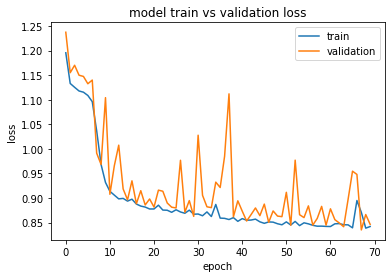

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


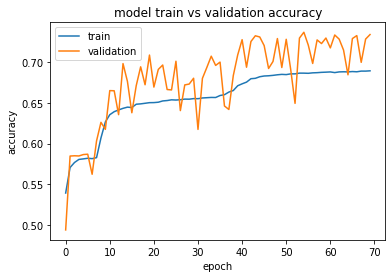

In [47]:
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


plt.plot(his.history['loss' ])
plt.plot(his.history[ 'val_loss' ])
plt.title( 'model train vs validation loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' ,  'validation' ], loc= 'upper_right' )
plt.show()

plt.plot(his.history['accuracy' ])
plt.plot(his.history[ 'val_accuracy' ])
plt.title( 'model train vs validation accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' ,  'validation' ], loc= 'upper_right' )
plt.show()


In [53]:
# predict probabilities for test set
yhat_probs = model1.predict(X_t_nn, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs,axis=1)


yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

y_Test = y_Test.replace('DDoS',3)
y_Test = y_Test.replace('Benign',0)
y_Test = y_Test.replace('Bot',1)
y_Test = y_Test.replace('Bruteforce',2)
y_Test = y_Test.replace('DoS',4)
y_Test = y_Test.replace('Infilteration',5)
y_Test = y_Test.replace('Web_attack',6)



In [54]:
y_Test_n=y_Test.to_numpy()
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_Test_n, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_Test_n, yhat_classes,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_Test_n, yhat_classes,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_Test_n, yhat_classes,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.670560


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.289584
Recall: 0.419347
F1 score: 0.315531


In [32]:
his2=model.fit(X_nn, y_enc, validation_data=(X_t_nn, y_Test_enc), epochs=70, verbose=2,batch_size=128)

Epoch 1/70
38302/38302 - 591s - loss: 0.1516 - accuracy: 0.9551 - val_loss: 0.1957 - val_accuracy: 0.9412
Epoch 2/70
38302/38302 - 589s - loss: 0.1520 - accuracy: 0.9553 - val_loss: 0.2411 - val_accuracy: 0.9399
Epoch 3/70
38302/38302 - 588s - loss: 0.1518 - accuracy: 0.9551 - val_loss: 0.1976 - val_accuracy: 0.9412
Epoch 4/70
38302/38302 - 590s - loss: 0.1514 - accuracy: 0.9553 - val_loss: 0.1981 - val_accuracy: 0.9418
Epoch 5/70
38302/38302 - 575s - loss: 0.1514 - accuracy: 0.9553 - val_loss: 0.1935 - val_accuracy: 0.9426
Epoch 6/70


KeyboardInterrupt: 

In [33]:
print(X_nn.shape)

(4902609, 1, 78)


In [15]:
%%time
# summarize the fit of the model
print("****************-----VALIDATION---*******************")
print("********************RANDOM FOREST *******************")
print(classification_report(expected,predicted))
print(metrics.accuracy_score(expected,predicted))

****************-----VALIDATION---*******************
********************RANDOM FOREST *******************
               precision    recall  f1-score   support

       Benign       0.97      0.99      0.98   1092698
          Bot       1.00      1.00      1.00    231692
   Bruteforce       0.84      0.94      0.89    308379
         DDoS       0.86      0.95      0.90   1023422
          DoS       0.81      0.59      0.68    530006
Infilteration       0.95      0.77      0.85    131361
        Label       1.00      1.00      1.00        53
   Web_attack       0.92      0.61      0.73       758

     accuracy                           0.90   3318369
    macro avg       0.92      0.86      0.88   3318369
 weighted avg       0.90      0.90      0.90   3318369

0.901036623714843
CPU times: user 2min, sys: 4.67 ms, total: 2min
Wall time: 2min


In [16]:
%%time
modelTotal = RandomForestClassifier(n_jobs=-1)
modelTotal.fit(X, y)
# make predictions
predictedTotal = modelTotal.predict(X_Test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
UsageError: Line magic function `%%time` not found.


In [17]:
# summarize the fit of the model
print("****************-----VALIDATION TOTAL---*******************")
print("**********************RANDOM FOREST*********************")
print(classification_report(expected,predictedTotal))

****************-----VALIDATION TOTAL---*******************
**********************RANDOM FOREST*********************
               precision    recall  f1-score   support

       Benign       0.98      1.00      0.99   1092698
          Bot       1.00      1.00      1.00    231692
   Bruteforce       0.84      0.94      0.89    308379
         DDoS       1.00      1.00      1.00   1023422
          DoS       0.96      0.90      0.93    530006
Infilteration       0.96      0.82      0.89    131361
        Label       1.00      1.00      1.00        53
   Web_attack       1.00      1.00      1.00       758

     accuracy                           0.97   3318369
    macro avg       0.97      0.96      0.96   3318369
 weighted avg       0.97      0.97      0.97   3318369



In [28]:
print((X_s.shape))

AttributeError: 'StandardScaler' object has no attribute 'shape'

In [29]:
%%time
X=pd.read_csv("X_smote.csv",sep=',',dtype=np.float32)
y=pd.read_csv("y_smote.csv")
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler


ValueError: Expected 2D array, got scalar array instead:
array=StandardScaler().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_s= scaler.fit_transform(np.array(X.values))

In [44]:


bestfeat = SelectKBest(chi2, k=20)
fit = bestfeat.fit(X_s, y)


NameError: name 'dataValues' is not defined

In [60]:
feat_importances = pd.Series(fit.scores_)
topFeatures = feat_importances.nlargest(50).copy().index.values
impor =  feat_importances.sort_values(ascending=True)
impor =  (impor-impor.min())/(impor.max()-impor.min())
c=0
for i in topFeatures:
    print ( c," ",X.columns[i]," score: ","{:.2f}".format(impor[i]))
    c=c+1


0    URG Flag Cnt  score:  1.00
1    RST Flag Cnt  score:  0.99
2    ECE Flag Cnt  score:  0.99
3    Bwd Pkts/s  score:  0.89
4   Init Bwd Win Byts  score:  0.84
5   Dst Port  score:  0.76
6    ACK Flag Cnt  score:  0.69
7   Init Fwd Win Byts  score:  0.67
8    Flow Pkts/s  score:  0.62
9   Fwd Seg Size Min  score:  0.43
10    Bwd IAT Tot  score:  0.33
11    PSH Flag Cnt  score:  0.32
12    Flow Duration  score:  0.29
13    Fwd IAT Tot  score:  0.29
14    Fwd Pkts/s  score:  0.28
15    Fwd PSH Flags  score:  0.27
16    SYN Flag Cnt  score:  0.27
17    Protocol  score:  0.18
18    Bwd Pkt Len Min  score:  0.13
19    Flow IAT Min  score:  0.11
20    Flow IAT Max  score:  0.11
21    Fwd IAT Max  score:  0.11
22    Bwd Pkt Len Mean  score:  0.11
23    Bwd Seg Size Avg  score:  0.11
24    Flow IAT Mean  score:  0.10
25    Fwd IAT Min  score:  0.10
26    Bwd Pkt Len Std  score:  0.09
27    Fwd IAT Mean  score:  0.09
28   Idle Min  score:  0.09
29   Idle Mean  score:  0.09
30   Idle Max  scor

In [ ]:
%%time
from sklearn.svm import OneClassSVM
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_13f, y)


 URG Flag Cnt
 RST Flag Cnt
 ECE Flag Cnt
 Bwd Pkts/s
Init Bwd Win Byts
Dst Port
 ACK Flag Cnt
Init Fwd Win Byts
 Flow Pkts/s
Fwd Seg Size Min
 Bwd IAT Tot
 PSH Flag Cnt
 Flow Duration
 Fwd IAT Tot
 Fwd Pkts/s


In [ ]:
%%time
import sys

original_stdout = sys.stdout # Save a reference to the original standard output

with open('resultado_RandomForestClassifier.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(classification_report(expected,predicted))
    sys.stdout = original_stdout # Reset the standard output to its original value


In [ ]:
%%time
clf = OneClassSVM(gamma='auto')
model_ocs=clf.fit(X_ben)


In [ ]:
pred_ben = clf.predict(X_ben)
print (pred_ben)

In [ ]:
X_Val=pd.read_csv("../Clustering/X_Val.csv",sep=',',dtype=np.float32)

In [ ]:
pred_val = clf.predict(X_Val)
print (pred_val)

In [6]:
%%time
# make predictions
expected = y_Test
predicted = model.predict(X_Test)
# summarize the fit of the model
print("****************-----TEST---*******************")
print("********************RANDOM FOREST *******************")
print(classification_report(expected,predicted))
print(metrics.accuracy_score(expected,predicted))

original_stdout = sys.stdout # Save a reference to the original standard output

with open('resultadoTEST_RandomForestClassifier.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(classification_report(expected,predicted))
    sys.stdout = original_stdout # Reset the standard output to its original value




****************-----TEST---*******************
********************RANDOM FOREST *******************
               precision    recall  f1-score   support

       Benign       0.98      1.00      0.99   1092698
          Bot       1.00      1.00      1.00    231692
   Bruteforce       0.84      0.94      0.89    308379
         DDoS       1.00      1.00      1.00   1023422
          DoS       0.96      0.90      0.93    530006
Infilteration       0.96      0.82      0.89    131361
        Label       1.00      1.00      1.00        53
   Web_attack       1.00      1.00      1.00       758

     accuracy                           0.97   3318369
    macro avg       0.97      0.96      0.96   3318369
 weighted avg       0.97      0.97      0.97   3318369

0.9697239818718172
CPU times: user 8min 49s, sys: 3.46 s, total: 8min 52s
Wall time: 6min 53s


In [ ]:
%%time
model2 = DecisionTreeClassifier()
model2.fit(X_smote, y_smote)
# make predictions
expected = y_Val
predicted = model2.predict(X_Val)
# summarize the fit of the model
print("****************-----VALIDATION---*******************")
print("********************DECISION TREE *******************")
print(classification_report(expected,predicted))
print(metrics.accuracy_score(expected,predicted))

original_stdout = sys.stdout # Save a reference to the original standard output

with open('resultadoVAL_DecisionTreeClassifier.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(classification_report(expected,predicted))
    sys.stdout = original_stdout # Reset the standard output to its original value



In [ ]:
%%time
# make predictions
expected = y_Test
predicted = model2.predict(X_Test)
# summarize the fit of the model
print("****************-----TEST---*******************")
print("********************DECISION TREE *******************")
print(classification_report(expected,predicted))
print(metrics.accuracy_score(expected,predicted))

original_stdout = sys.stdout # Save a reference to the original standard output

with open('resultadoTEST_DecisionTreeClassifier.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(classification_report(expected,predicted))
    sys.stdout = original_stdout # Reset the standard output to its original value



In [15]:
%%time
model5 = AdaBoostClassifier(n_estimators=100)
model5.fit(X_smote, y_smote)
# make predictions
predicted = model5.predict(X_Val)
expected = y_Val
# summarize the fit of the model
print("**********************---VALIDATION---************************")
print("********************ADA BOOST*******************")
print(classification_report(expected,predicted))
print(metrics.accuracy_score(expected,predicted))

original_stdout = sys.stdout # Save a reference to the original standard output

with open('resultadoVAL_DecisionTreeClassifier.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(classification_report(expected,predicted))
    sys.stdout = original_stdout # Reset the standard output to its original value




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


**********************---VALIDATION---************************
********************ADA BOOST*******************


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                  Benign       0.33      1.00      0.50    121193
                     Bot       0.00      0.00      0.00     25810
        Brute Force -Web       0.00      0.00      0.00        59
        Brute Force -XSS       0.00      0.00      0.00        21
        DDOS attack-HOIC       0.00      0.00      0.00     61498
    DDOS attack-LOIC-UDP       0.71      1.00      0.83       152
  DDoS attacks-LOIC-HTTP       0.00      0.00      0.00     51909
   DoS attacks-GoldenEye       0.00      0.00      0.00      3841
        DoS attacks-Hulk       0.00      0.00      0.00     41406
DoS attacks-SlowHTTPTest       0.00      0.00      0.00     12659
   DoS attacks-Slowloris       0.00      0.00      0.00      1039
          FTP-BruteForce       0.00      0.00      0.00     17583
           Infilteration       0.89      0.01      0.01     14531
                   Label       0.00      0.00      0.00         3
         

In [16]:
# make predictions
predicted = model5.predict(X_Test)
expected = y_Test
# summarize the fit of the model
print("**********************---TEST---************************")
print("********************ADA BOOST*******************")
print(classification_report(expected,predicted))
print(metrics.accuracy_score(expected,predicted))

**********************---TEST---************************
********************ADA BOOST*******************


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                  Benign       0.33      1.00      0.50   1092698
                     Bot       0.00      0.00      0.00    231692
        Brute Force -Web       0.00      0.00      0.00       493
        Brute Force -XSS       0.00      0.00      0.00       188
        DDOS attack-HOIC       0.00      0.00      0.00    555555
    DDOS attack-LOIC-UDP       0.67      1.00      0.80      1397
  DDoS attacks-LOIC-HTTP       0.00      0.00      0.00    466470
   DoS attacks-GoldenEye       0.00      0.00      0.00     33524
        DoS attacks-Hulk       0.00      0.00      0.00    374394
DoS attacks-SlowHTTPTest       0.00      0.00      0.00    113242
   DoS attacks-Slowloris       0.00      0.00      0.00      8846
          FTP-BruteForce       0.00      0.00      0.00    156352
           Infilteration       0.86      0.01      0.02    131361
                   Label       0.00      0.00      0.00        53
         